In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
df <- read.csv("results/N100-F1000-S100-R100-result-v6-gamma.csv") %>% mutate(algorithm = factor(algorithm))
summary(df)

  correlation        load      algorithm        value          
 Min.   :0.00   Min.   :0.70   BF  :10500   Min.   :1.441e+06  
 1st Qu.:0.25   1st Qu.:0.75   RR  :10500   1st Qu.:3.379e+06  
 Median :0.50   Median :0.80   SALP:10500   Median :4.718e+06  
 Mean   :0.50   Mean   :0.80                Mean   :6.669e+06  
 3rd Qu.:0.75   3rd Qu.:0.85                3rd Qu.:7.301e+06  
 Max.   :1.00   Max.   :0.90                Max.   :3.015e+09  
                                            NA's   :3380       
  disturbance      
 Min.   :0.009174  
 1st Qu.:0.122857  
 Median :0.149313  
 Mean   :0.140921  
 3rd Qu.:0.170615  
 Max.   :0.204482  
                   

In [4]:
grp <- df %>% 
    filter(!is.na(value)) %>%
    group_by(correlation, load, algorithm) %>% 
    summarise(value=mean(value), std=sd(value, na.rm = TRUE), cnt = n(), se = std/sqrt(cnt), .groups="drop")
head(grp)
## TODO why sd is not working

correlation,load,algorithm,value,std,cnt,se
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<dbl>
0,0.70,BF,2817824,NA,100,NA
0,0.70,RR,2949303,NA,100,NA
0,0.70,SALP,2894677,NA,100,NA
0,0.75,BF,3626702,NA,100,NA
0,0.75,RR,3894420,NA,100,NA
0,0.75,SALP,3771173,NA,100,NA


Saving 6.67 x 6.67 in image



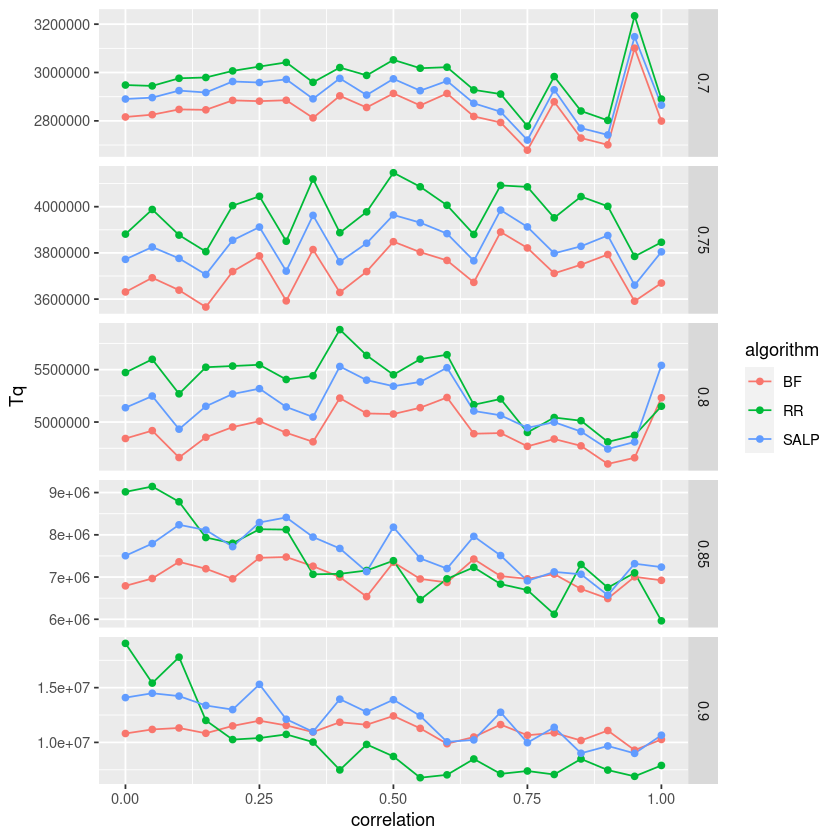

In [5]:
plt <- ggplot(
    df %>% 
    group_by(correlation, load, algorithm) %>% 
    summarise(value=median(value, na.rm=TRUE), .groups="drop"),
    aes(x=correlation, y=value, color=algorithm)
) + 
geom_line() + 
geom_point() + 
ylab("Tq") + 
facet_grid(load ~ ., scales="free")

ggsave("plot-tq.png")

plt

Saving 6.67 x 6.67 in image



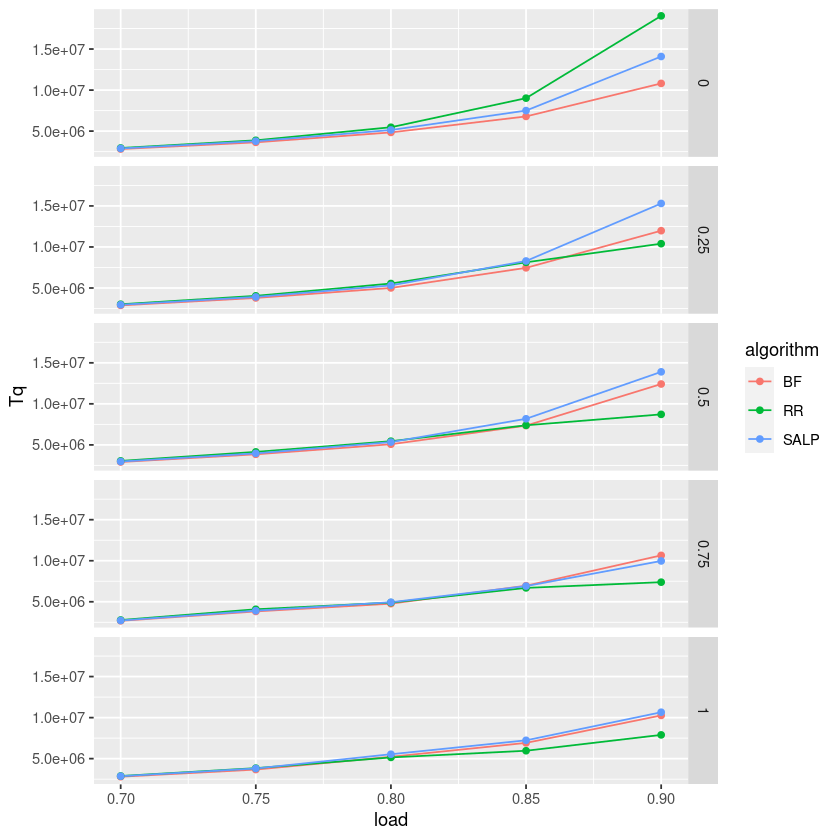

In [6]:
plt <- ggplot(
    df %>% 
      filter(value != -1) %>% 
      filter(correlation %in% c(0, .25, .5, .75, 1)) %>%
      group_by(correlation, load, algorithm) %>% 
      summarise(value=median(value, na.rm=TRUE), .groups="drop"),
    aes(x=load, y=value, color=algorithm)
) + 
geom_line() + 
geom_point() + 
ylab("Tq") + 
facet_grid(correlation ~ .)

ggsave("plot-tq-pivot.png")

plt

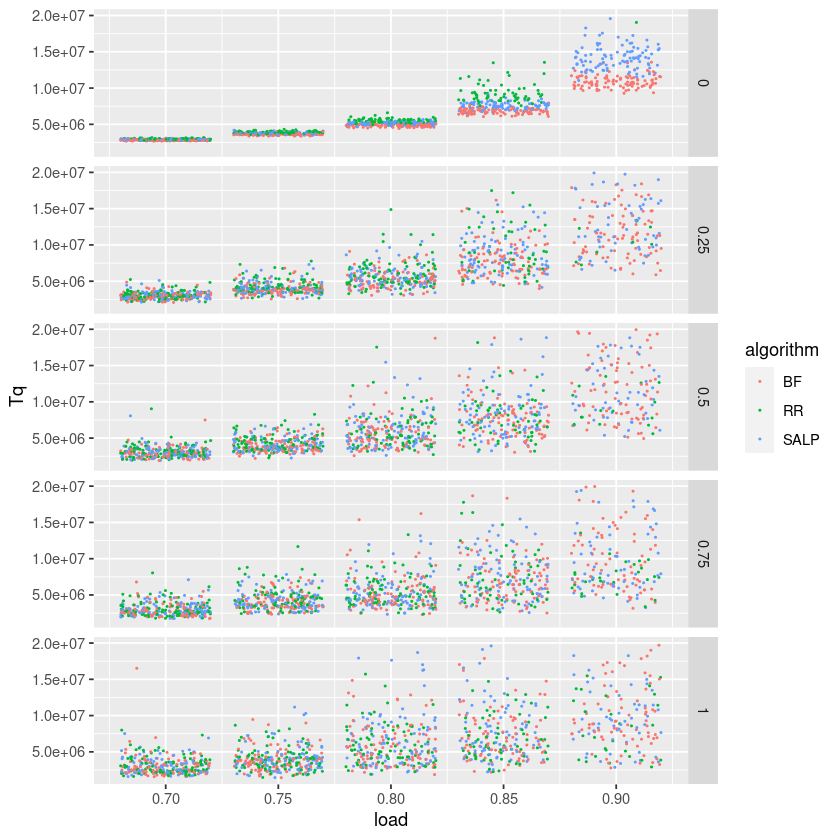

In [14]:
plt <- ggplot(
    df %>% 
      filter(!is.na(value)) %>% 
      filter(value < 20000000) %>%
      filter(correlation %in% c(0, .25, .5, .75, 1)),# %>%
    #   group_by(correlation, load, algorithm) %>% 
    #   summarise(value=median(value, na.rm=TRUE), .groups="drop"),
    aes(x=load, y=value, color=algorithm)
) + 
# geom_line() + 
# geom_point() + 
geom_jitter(size=0.2) +
ylab("Tq") + 
facet_grid(correlation ~ .)

# ggsave("plot-tq-pivot.png")

plt

`summarise()` regrouping output by 'correlation', 'load' (override with `.groups` argument)

Saving 6.67 x 6.67 in image



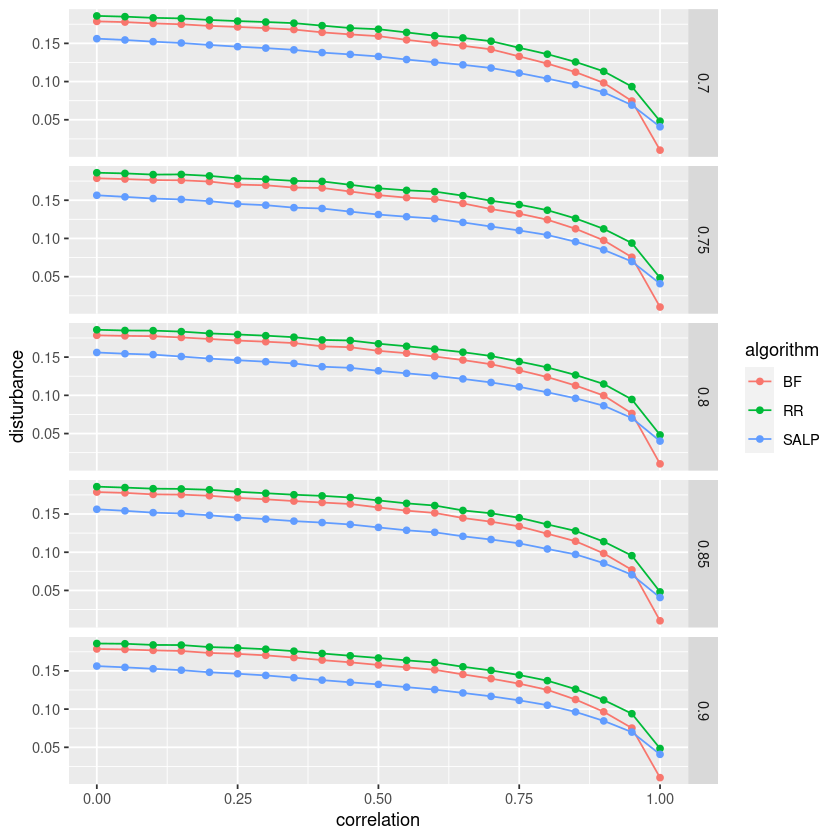

In [8]:
plt <- ggplot(
    df %>% 
    group_by(correlation, load, algorithm) %>% 
    summarise(disturbance=mean(disturbance)),
    aes(x=correlation, y=disturbance, color=algorithm)
) + 
geom_line() + 
geom_point() + 
facet_grid(load ~ .)

ggsave("plot-disturbance.png")

plt

In [9]:
df %>% filter(is.na(value)) %>% count(algorithm, load)

algorithm,load,n
<fct>,<dbl>,<int>
BF,0.80,1
BF,0.85,21
BF,0.90,150
RR,0.70,1
RR,0.75,14
RR,0.80,156
RR,0.85,797
RR,0.90,1699
SALP,0.80,5


In [10]:
df %>% filter(algorithm == "RR" & load == "0.9") %>% count(algorithm, load)

algorithm,load,n
<fct>,<dbl>,<int>
RR,0.9,2100


In [11]:
df %>% filter(is.na(value)) %>% count(algorithm, correlation)

algorithm,correlation,n
<fct>,<dbl>,<int>
BF,0.20,1
BF,0.35,7
BF,0.40,8
BF,0.45,7
BF,0.50,7
BF,0.55,10
BF,0.60,11
BF,0.65,18
BF,0.70,11
